In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [5]:
np.random.seed(42)

#storing the random data and labels
data = []
groups = []
labels_var = []
labels_size = []

#The values we use for the standard deviations and the sample sizes.
variability = [5, 20, 50]
sizes = [10, 100, 10000]

#Generating data for each group for each combination of variability and sample size.
for var in variability:
    for size in sizes:
        data.extend(np.random.normal(20,var,size))
        data.extend(np.random.normal(35,var,size))
        labels_var.extend([var]*size*2)
        labels_size.extend([size]*size*2)
        groups.extend(['group1']*size)
        groups.extend(['group2']*size)



In [6]:
#Putting the data together in a data frame and checking it.

data = pd.DataFrame({'data': data, 
                     'groups' : groups,
                    'variability':labels_var,
                    'size':labels_size})
data.head()

,data,groups,variability,size
0,22.483571,group1,5,10
1,19.308678,group1,5,10
2,23.238443,group1,5,10
3,27.615149,group1,5,10
4,18.829233,group1,5,10


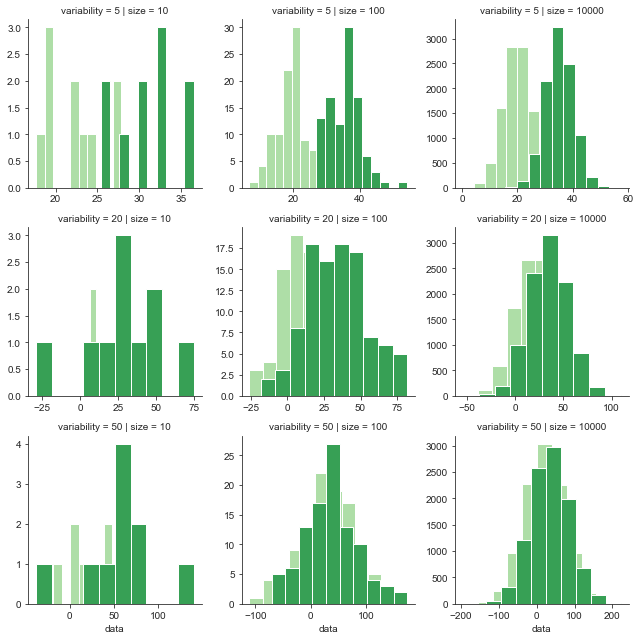

In [30]:
# Plotting the data.  
# Because we organized the data frame in a stacked (long) format, the plotting code is very straightforward.
#sns.set_palette(palette='RdBu', n_colors=4)
sns.set_palette(palette='Greens', n_colors=2)
sns.set_style('ticks')
g = sns.FacetGrid(data, col='size', row='variability', hue='groups', sharex=False, sharey=False)
g.map(plt.hist, 'data')
plt.show()

In [32]:
# Setting the three non-data columns to work as multi-indices. 
# This makes it much easier to get subsections of stacked data.
data_test = data.set_index(['groups','size','variability'])

# Storing our t-values and p-values (we'll get to p-values in a sec).
tvalues=[]
pvalues=[]

#For each combination of sample size and variability, compare the two groups using a t-test
for size in sizes:
    for var in variability:
        a = data_test['data'].xs(('group1',size,var),level=('groups','size','variability'))
        b = data_test['data'].xs(('group2',size,var),level=('groups','size','variability'))
        tval,pval=stats.ttest_ind(b, a,equal_var=True)
        tvalues.append(tval)
        pvalues.append(pval)

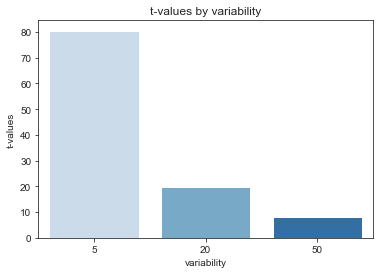

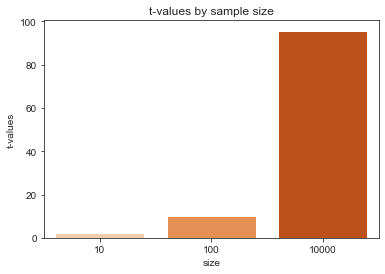

In [38]:
#Creating a data frame for plotting purposes.
tvalues_plot=pd.DataFrame({'t':tvalues,
                           'p':pvalues,
                          'variability':variability*3,
                          'size':np.repeat(sizes,3)})

# t-values by variability
ax = sns.barplot(y='t',x='variability',ci=None,data=tvalues_plot,palette='Blues')
ax.set(ylabel='t-values',title='t-values by variability')
plt.show()

# t-values by sample size
ax = sns.barplot(y='t',x='size',ci=None,data=tvalues_plot,palette='Oranges')
ax.set(ylabel='t-values',title='t-values by sample size')
plt.show()

In [43]:
print('Calculate the t-values: ' + '''
1. 𝑦1¯=5 ,  𝑦2¯=8 ,  𝑠1=1 ,  𝑠2=3 ,  𝑁1=200 ,  𝑁2=500 
2. 𝑦1¯=1090 ,  𝑦2¯=999 ,  𝑠1=400 ,  𝑠2=30 ,  𝑁1=900 ,  𝑁2=100 
3. 𝑦1¯=45 ,  𝑦2¯=40 ,  𝑠1=45 ,  𝑠2=40 ,  𝑁1=2000 ,  𝑁2=2000
''')
print('Formula:')

Calculate the t-values: 
1. 𝑦1¯=5 ,  𝑦2¯=8 ,  𝑠1=1 ,  𝑠2=3 ,  𝑁1=200 ,  𝑁2=500 
2. 𝑦1¯=1090 ,  𝑦2¯=999 ,  𝑠1=400 ,  𝑠2=30 ,  𝑁1=900 ,  𝑁2=100 
3. 𝑦1¯=45 ,  𝑦2¯=40 ,  𝑠1=45 ,  𝑠2=40 ,  𝑁1=2000 ,  𝑁2=2000

Formula:


$$t = \frac{\bar{y_1}-\bar{y_2}}{\sqrt{s^2_1/N_1+s^2_2/N_2}}$$

In [55]:
import math
def t_value(y1, y2, s1, s2, n1, n2):
    diff_mean = y1 - y2
    sum_denom = ((s1**2)/n1) + ((s2**2)/n2)
    square_denom = math.sqrt(sum_denom)
    return diff_mean / square_denom

In [58]:
t_value(5, 8, 1, 3, 200, 500)

-19.78141420187361

In [59]:
t_value(1090, 999, 400, 30, 900, 100)

6.658536585365854

In [60]:
t_value(45, 40, 45, 40, 2000, 2000)

3.7139067635410377